In [1]:
import nltk
import json

In [2]:
from tqdm import tqdm

In [3]:
file_d = []
reviews_sent = []
reviews_neg_sent = []
reviews_str = ""
reviews_pos_str = ""
reviews_neg_str = ""

In [4]:
file = '/Users/gkhanna/Downloads/reviews_Home_and_Kitchen_5.json'

Reading "count" of the file for faster experiments
count = 0 pulls in all data

In [5]:
# Reading count number of JSON lines from the file
count = 0
n = 0
with open(file, "r") as f:
    for line in tqdm(f):
        file_d.append(json.loads(line))
        n =  n + 1
        if count > 0 and n == count:
            break
    


551682it [00:06, 85983.85it/s] 


In [6]:
# Checking the structures
print(len(file_d))
print(type(file_d))
print(file_d[0])
print(type(file_d[0]))

551682
<class 'list'>
{'reviewerID': 'APYOBQE6M18AA', 'asin': '0615391206', 'reviewerName': 'Martin Schwartz', 'helpful': [0, 0], 'reviewText': 'My daughter wanted this book and the price on Amazon was the best.  She has already tried one recipe a day after receiving the book.  She seems happy with it.', 'overall': 5.0, 'summary': 'Best Price', 'unixReviewTime': 1382140800, 'reviewTime': '10 19, 2013'}
<class 'dict'>


In [7]:
print(file_d[0]['reviewText'])

My daughter wanted this book and the price on Amazon was the best.  She has already tried one recipe a day after receiving the book.  She seems happy with it.


Read in reviews that correspond to the list of ASIN's (Amazon product ID's) selected. 
Choosing the ASIN that has ~ 1000 reviews from the EDA

In [8]:
# ASIN corresponding to the Iron Skillet
pl = ['B00006JSUA']

In [9]:
# ASIN's for Iron Skillets from Jey's web scraping
# pl = ['B075MRX5N3', 'B06XT6GZ9V', 'B00006JSUA', 'B00006JSUA', 'B07GKZXS2T', 'B000VTOG78', 'B00X4WQMAS', 'B00G2XGC88', 'B073Q8P6CQ', 'B073Q8DY3F']

In [10]:
# Trying out the ASIN's for toothbrush holder
# pl = ['B078GVMVRH', 'B078GVH2VJ', 'B00SX07354', 'B00CC6XSRC', 'B0777SKKBL', 'B072YVWBXH', 'B01AKGRTUM', 'B07CMHRZRT', 'B07CMHRZS2', 'B073Q58L6Q']

In [11]:
# Getting the reviews out of the dictionary
# into a list and string
for r in tqdm(file_d):
    if r['asin'] in pl:
        reviews_sent.append(r['reviewText'])
        reviews_str = reviews_str + str(r['reviewText'])
        if ((r['overall'] == 1.0) or (r['overall'] == 2.0)):
            reviews_neg_str = reviews_neg_str + str(r['reviewText'])
        else:
            reviews_pos_str = reviews_pos_str + str(r['reviewText'])

100%|██████████| 551682/551682 [00:00<00:00, 1898822.36it/s]


In [12]:
print(type(reviews_sent))
print(len(reviews_sent))
print(reviews_sent[0])

<class 'list'>
1064
Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.


In [13]:
# print(reviews_sent)

In [14]:
print(len(reviews_str))
print(len(reviews_pos_str))
print(len(reviews_neg_str))

598363
572557
25806


In [15]:
print(reviews_str[:100])
print(reviews_pos_str[:100])
print(reviews_neg_str[:100])

Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of c
Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of c
I've always bought the regular Lodge skillets and loved them.  Went with the pre-seasoned this time 


Summarizing before doing anything else with the review strings

In [16]:
from gensim.summarization import summarize

In [109]:
reviews_str = summarize(reviews_str, ratio=.5)

In [110]:
print(len(reviews_str))
print(reviews_str[:100])

102914
Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of c


In [19]:
reviews_pos_str = summarize(reviews_pos_str)
reviews_neg_str = summarize(reviews_neg_str)

In [20]:
print(len(reviews_pos_str))
print(reviews_pos_str[:100])
print(len(reviews_neg_str))
print(reviews_neg_str[:100])

197953
Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of c
8073
Been using good old American-made Lodge skillets for years, plus we regularly use a big cast iron wo


Separating out sentences into a list
PunktSentenceTokenizer is customized to separate sentences on a few extra words and characters as wel

In [21]:
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktLanguageVars
'''We customize the ReviewLangVars class to separate sentences based on some additional keywords'''


class ReviewLangVars(PunktLanguageVars):
    sent_end_chars = ('pros:', 'cons:', '[','][','.','?','!')
    
sent_tokenizer1 = PunktSentenceTokenizer(lang_vars = ReviewLangVars())
# sent_tokenizer1 = PunktSentenceTokenizer()
sent_fullreview = sent_tokenizer1.tokenize(reviews_str)
sent_neg_review = sent_tokenizer1.tokenize(reviews_neg_str)
sent_pos_review = sent_tokenizer1.tokenize(reviews_pos_str)

In [22]:
# This are the original sentences tokenized
print(sent_fullreview[0])
print(sent_fullreview[:5])
print(len(sent_fullreview))

Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.This is an absolutely amazing skillet!!
['Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.This is an absolutely amazing skillet!!', "I re-season it a bit as well to keep it going strong!I've always bought the regular Lodge skillets and loved them.", "Been using good old American-made Lodge skillets for years, plus we regularly use a big cast iron wok imported from China.So, I'm giving only two stars because the pre-seasoning is a messy hassle.Now I've got to cook dinner.So far I am loving this skillet!", 'And another review complainin

In [23]:
# This are the negative sentences tokenized
print(sent_neg_review[0])
print(sent_neg_review[:5])
print(len(sent_neg_review))

Been using good old American-made Lodge skillets for years, plus we regularly use a big cast iron wok imported from China.So, I'm giving only two stars because the pre-seasoning is a messy hassle.Now I've got to cook dinner.I bought this specifically for cooking eggs.
["Been using good old American-made Lodge skillets for years, plus we regularly use a big cast iron wok imported from China.So, I'm giving only two stars because the pre-seasoning is a messy hassle.Now I've got to cook dinner.I bought this specifically for cooking eggs.", 'On the first use before heating, I noticed the pan bottom was warped upward in the center allowing oil and food to run to the edge.', 'Why would Amazon think I would want a cracked skillet?used once, wiped it out to use again.', 'The cooking surface has a "rough" texture which causes food to stick unnecessarily, whereas it should have been ground smooth before leaving the factory.', 'The "loop" handle was a good idea, otherwise most folks would likely s

In [24]:
# This are the positive sentences tokenized
print(sent_pos_review[0])
print(sent_pos_review[:5])
print(len(sent_pos_review))

Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.This is an absolutely amazing skillet!!
['Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.This is an absolutely amazing skillet!!', 'And another review complaining that the handle gets', 'hot!', "!If you are familiar with cast-iron, and are willing to give it the minimal care it requires, you'll love this.", 'With proper seasoning (not the garbage spray lodge puts on) a nice piece of cast iron will be virtuly non-stick.']
1128


Extracting common Items using apriori
https://github.com/asaini/Apriori

In [25]:
import sys

from itertools import chain, combinations
from collections import defaultdict
from optparse import OptionParser


def subsets(arr):
    """ Returns non empty subsets of arr"""
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])


def returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet):
        """calculates the support for items in the itemSet and returns a subset
       of the itemSet each of whose elements satisfies the minimum support"""
        _itemSet = set()
        localSet = defaultdict(int)

        for item in itemSet:
                for transaction in transactionList:
                        if item.issubset(transaction):
                                freqSet[item] += 1
                                localSet[item] += 1

        for item, count in localSet.items():
                support = float(count)/len(transactionList)

                if support >= minSupport:
                        _itemSet.add(item)

        return _itemSet


def joinSet(itemSet, length):
        """Join a set with itself and returns the n-element itemsets"""
        return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])


def getItemSetTransactionList(data_iterator):
    transactionList = list()
    itemSet = set()
    for record in data_iterator:
        transaction = frozenset(record)
        transactionList.append(transaction)
        for item in transaction:
            itemSet.add(frozenset([item]))              # Generate 1-itemSets
    return itemSet, transactionList


def runApriori(data_iter, minSupport, minConfidence):
    """
    run the apriori algorithm. data_iter is a record iterator
    Return both:
     - items (tuple, support)
     - rules ((pretuple, posttuple), confidence)
    """
    itemSet, transactionList = getItemSetTransactionList(data_iter)

    freqSet = defaultdict(int)
    largeSet = dict()
    # Global dictionary which stores (key=n-itemSets,value=support)
    # which satisfy minSupport

    assocRules = dict()
    # Dictionary which stores Association Rules

    oneCSet = returnItemsWithMinSupport(itemSet,
                                        transactionList,
                                        minSupport,
                                        freqSet)

    currentLSet = oneCSet
    k = 2
    while(currentLSet != set([])):
        largeSet[k-1] = currentLSet
        currentLSet = joinSet(currentLSet, k)
        currentCSet = returnItemsWithMinSupport(currentLSet,
                                                transactionList,
                                                minSupport,
                                                freqSet)
        currentLSet = currentCSet
        k = k + 1

    def getSupport(item):
            """local function which Returns the support of an item"""
            return float(freqSet[item])/len(transactionList)

    toRetItems = []
    for key, value in tqdm(list(largeSet.items())):
        toRetItems.extend([(tuple(item), getSupport(item))
                           for item in value])

    toRetRules = []
    for key, value in tqdm(list(largeSet.items())[1:]):
        for item in value:
            _subsets = map(frozenset, [x for x in subsets(item)])
            for element in _subsets:
                remain = item.difference(element)
                if len(remain) > 0:
                    confidence = getSupport(item)/getSupport(element)
                    if confidence >= minConfidence:
                        toRetRules.append(((tuple(element), tuple(remain)),
                                           confidence))
    return toRetItems, toRetRules


def printResults(items):
    """prints the generated itemsets sorted by support and the confidence rules sorted by confidence"""
    for item, support in sorted(items, key=lambda item_support: item_support[1], reverse=True):
        print(str(item), support)

In [26]:
# Utility functions
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

lem = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
lem_word_mapping = {}

# Find leaves of a tree
def leaves(tree):
    """Finds leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label() in ['P1','P2','P3','P4','P5','P6','P7','P8']):
        yield subtree.leaves()
    
def stem(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = word.replace("'","").replace('"','').replace('.','')
    word1 = stemmer.stem(word)
    return word1

# lowercase, stem and lemmatize
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word1 = stemmer.stem(word)
    word2 = lem.lemmatize(word1)
    if word != word2:
        lem_word_mapping[word2] = word
    return word2

def acceptableWord(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool((2 <= len(word) <= 40) and word.lower() not in stopwords)
    return accepted

# extract words after normalizing and checking if acceptable
def getTerms(tree):
    """Returns the words after checking acceptable conditions, normalizing and lemmatizing"""
    term = [ stem(w) for w in tree if acceptableWord(w) ]
    return term
    
def getNorm(tree):
    """Parse leaves in chunk and return after checking acceptable conditions, normalizing and lemmatizing"""
    for leaf in leaves(tree):
        term = [ normalise(w) for w,t in leaf if acceptableWord(w) ]
        yield term

Set of nouns for each sentence

In [27]:
# Set of nouns for the apriori algorithm

def isNoun(n):
    if n=='NN' or n=='NNS' or n=='NNP' or n=='NNPS':
        return True

revset=[]
for line in tqdm(sent_fullreview):
    # print(line)
    a = nltk.word_tokenize(line)
    # print(a)
    nouns = [word for (word, pos) in nltk.pos_tag(a) if isNoun(pos)] 
    # print(nouns)
    terms = getTerms(nouns)
    # print(terms)

    revset.append(terms)



100%|██████████| 1180/1180 [00:02<00:00, 532.38it/s]


In [28]:
print(revset[0])
print(revset[:10])

['treatment', 'stick', 'pan', 'friend', 'size', 'cast', 'iron', 'pan', 'children', 'chemic', 'part', 'pan', 'decadesthi', 'skillet']
[['treatment', 'stick', 'pan', 'friend', 'size', 'cast', 'iron', 'pan', 'children', 'chemic', 'part', 'pan', 'decadesthi', 'skillet'], ['bit', 'lodg', 'skillet'], ['lodg', 'skillet', 'year', 'cast', 'iron', 'wok', 'chinaso', 'star', 'pre-season', 'hasslenow', 'dinnerso', 'skillet'], ['review'], [], ['cast-iron', 'care'], ['garbag', 'spray', 'lodg', 'piec', 'cast', 'iron'], ['lodg', 'time', 'pan', 'pan', 'hype', 'steak', 'cast', 'iron'], ['fact', 'fillet', 'mignon', 'skillet', 'cut', 'meat', 'outdoor', 'grill', 'exterior', 'interior'], ['burger', 'burger', 'cut', 'meat', 'lot', 'smoke', 'indoor', 'babi', 'window', 'fan', 'ribey', 'apart', 'bbq', 'pit', 'day']]


In [29]:
len(revset)

1180

Extracting the items contained in the reviews

In [30]:
items, rules = runApriori(revset, 0.1, 0.1)
printResults(items)

100%|██████████| 2/2 [00:00<00:00, 8542.37it/s]

('iron',) 0.5474576271186441
('pan',) 0.43728813559322033
('cast',) 0.43728813559322033
('iron', 'cast') 0.43050847457627117
('skillet',) 0.4033898305084746
('iron', 'skillet') 0.23728813559322035
('iron', 'pan') 0.2228813559322034
('skillet', 'cast') 0.2016949152542373
('skillet', 'iron', 'cast') 0.19830508474576272
('cast', 'pan') 0.17796610169491525
('cast', 'iron', 'pan') 0.17542372881355933
('lodg',) 0.1711864406779661
('iron', 'lodg') 0.11949152542372882
('time',) 0.1152542372881356
('skillet', 'pan') 0.11101694915254237
('oil',) 0.10508474576271186
('cook',) 0.10254237288135593


Polarity of the sentences, conventional Liu and Hu Opinion Lexicon
TBD: We may want to substitute with a more advanced sentiment detection algorithm

In [31]:
def custom_liu_hu_lexicon(sentence):
    '''Takes in a sentence and returns the sentiment of the sentence by counting the no of positive and negitive 
    and negitive words and by reversing the sentiment if the words NO or NOT are present
    '''
    from nltk.corpus import opinion_lexicon
    from nltk.tokenize import treebank

    tokenizer = treebank.TreebankWordTokenizer()
    pos_words = 0
    neg_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(sentence)]

    x = list(range(len(tokenized_sent))) 
    y = []
    isNegation = False
    negationWords = ['no','not','never','none','hardly','rarely','scarcely','']

    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            pos_words += 1
            y.append(1) # positive
        elif word in opinion_lexicon.negative():
            neg_words += 1
            y.append(-1) # negative
        else:
            y.append(0) # neutral
            
        if word in negationWords:
            isNegation = True

    if pos_words > neg_words and isNegation==True:
        return 'neg'
    elif pos_words > neg_words:
        return 'pos'
    elif pos_words < neg_words and isNegation==True:
        return 'pos'
    elif pos_words < neg_words:
        return 'neg'
    elif pos_words == neg_words:
        return 'neutral'

In [32]:
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/gkhanna/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [33]:
# Extracting sentiments from the positive reviews
neutral_review=[]
positive_review=[]
negative_review=[]

for sentence in tqdm(sent_pos_review):
    for i in items:
        if i[0][0] in sentence:
            #print(i[0][0] +"--" + sentence)
            x=custom_liu_hu_lexicon(sentence)
            if(x=="pos"):
                positive_review.append(sentence)
            elif(x=="neg"):
                negative_review.append(sentence)
            else:
                neutral_review.append(sentence)
            break

# Extracting sentiments from the negative reviews
for sentence in tqdm(sent_neg_review):
    for i in items:
        if i[0][0] in sentence:
            #print(i[0][0] +"--" + sentence)
            x=custom_liu_hu_lexicon(sentence)
            if(x=="pos"):
                positive_review.append(sentence)
            elif(x=="neg"):
                negative_review.append(sentence)
            else:
                neutral_review.append(sentence)
            break
            
print('done')

100%|██████████| 46/46 [00:28<00:00,  1.63it/s]

done


In [34]:
print(positive_review[:5])

["!If you are familiar with cast-iron, and are willing to give it the minimal care it requires, you'll love this.", 'Lodge simply does not spend the time to finish their pans like they used to and the pans suffer now.I got this for the hype of searing steaks and etc on cast iron.', "In fact, after cooking my first fillet Mignon in this skillet I realized it's actually better suited to this cut of meat than an outdoor grill - it leaves a perfectly seared, caramelized exterior and a nice red interior (just like I like it).", 'and it was a perfect size for me.I use this skillet all the time cooking steaks and when i fry anything.', "I would also recommend the griddle...it's great.If you are going between the 10 and 12 inch pan...get the 12 there's more room for a full steak.I like all my cast iron."]


In [35]:
print(negative_review[:5])

['With proper seasoning (not the garbage spray lodge puts on) a nice piece of cast iron will be virtuly non-stick.', "I never cooked with cast iron so I can't explain why, but I prefer using this lodge logic to my other nice cookware.My wife has made sure that I keep and clean it correctly when I use it, so it's in perfect shape and cooks beautifully.I had an ancient 8 inch cast iron skillet that has been in my family forever and it's getting very pitted and food is sticking more and more.", "I'd never cooked with one and found the idea of using something not coated in teflon pretty intimidating.Then, I got this Lodge cast iron skillet.", "I'm used to being able to grabbing the handle of anything that's on the stove and with this one that's not the case, which I fortunately figured out before it got too hot.I purchased three of these pans a couple of years ago.", 'This pan has virtually no hot spots, seasons well, as a result cleans like a dream.']


In [36]:
print(neutral_review[:5])

['Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.This is an absolutely amazing skillet!!', 'From deep frying (nice heavy pan holds heat well), pan searing then putting the whole pan into the oven to roast and finish, to even baking!Do not use this for braising or say...\nLodge has been making cast-iron for a long time and they make great products.This is my first experience cooking with cast iron.', 'Once the skillet is dry, I pour in just a bit of oil and spread it around before storing the pan until the next use.With good care and a bit of effort, cast iron is a kitchen essential.', 'They are heavy to handle but if you are buying a cast iron skillet, you know that anyway.', 'If you carefully examine most cast iron cookware, you will see some imperfections.The first three times I u

In [37]:
print(positive_review[1])

Lodge simply does not spend the time to finish their pans like they used to and the pans suffer now.I got this for the hype of searing steaks and etc on cast iron.


In [38]:
# Convert all sentences into tokens/words
all_sen_tok = []
for sentence in tqdm(sent_fullreview):
    all_sen_tok.append(nltk.word_tokenize(sentence))

100%|██████████| 1180/1180 [00:00<00:00, 5605.01it/s]


In [39]:
# Convert positive, negative and neutral sentences into tokens/words
pos_sen_tok = []
neg_sen_tok = []
neutral_sen_tok = []
for sentence in tqdm(positive_review):
    pos_sen_tok.append(nltk.word_tokenize(sentence))
for sentence in tqdm(negative_review):
    neg_sen_tok.append(nltk.word_tokenize(sentence))
for sentence in tqdm(neutral_review):
    neutral_sen_tok.append(nltk.word_tokenize(sentence))    

100%|██████████| 256/256 [00:00<00:00, 6579.58it/s]


In [40]:
print(all_sen_tok[0])
print(pos_sen_tok[:2])
print(neg_sen_tok[0])

['Just', 'say', 'no', 'to', 'chemical', 'treatments', 'on', 'non', 'stick', 'pans', ',', 'get', 'yourself', 'and', 'your', 'friends', 'a', 'few', 'sizes', 'of', 'cast', 'iron', 'and', 'have', 'pans', 'that', 'you', 'can', 'pass', 'down', 'to', 'your', 'children', ',', 'without', 'all', 'those', 'unknown', 'chemicals', 'that', 'are', 'such', 'a', 'part', 'of', 'pans', 'for', 'the', 'last', 'few', 'decades.This', 'is', 'an', 'absolutely', 'amazing', 'skillet', '!', '!']
[['!', 'If', 'you', 'are', 'familiar', 'with', 'cast-iron', ',', 'and', 'are', 'willing', 'to', 'give', 'it', 'the', 'minimal', 'care', 'it', 'requires', ',', 'you', "'ll", 'love', 'this', '.'], ['Lodge', 'simply', 'does', 'not', 'spend', 'the', 'time', 'to', 'finish', 'their', 'pans', 'like', 'they', 'used', 'to', 'and', 'the', 'pans', 'suffer', 'now.I', 'got', 'this', 'for', 'the', 'hype', 'of', 'searing', 'steaks', 'and', 'etc', 'on', 'cast', 'iron', '.']]
['With', 'proper', 'seasoning', '(', 'not', 'the', 'garbage', '

In [41]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gkhanna/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [42]:
# Gave an error without downloading the nltk averaged_perceptron_tagger
# Find POS tags for all the sentences
all_sen_tok_tagged = []
for sentence_t in tqdm(all_sen_tok):
    all_sen_tok_tagged.append(nltk.tag.pos_tag(sentence_t))

100%|██████████| 1180/1180 [00:01<00:00, 766.88it/s]


In [43]:
# Gave an error without downloading the nltk averaged_perceptron_tagger
# Find POS tags for positive, negative and neutral sentences
pos_sen_tok_tagged = []
neg_sen_tok_tagged = []
neutral_sen_tok_tagged = []
for sentence_t in tqdm(pos_sen_tok):
    pos_sen_tok_tagged.append(nltk.tag.pos_tag(sentence_t))
for sentence_t in tqdm(neg_sen_tok):
    neg_sen_tok_tagged.append(nltk.tag.pos_tag(sentence_t))
for sentence_t in tqdm(neutral_sen_tok):
    neutral_sen_tok_tagged.append(nltk.tag.pos_tag(sentence_t))

100%|██████████| 256/256 [00:00<00:00, 890.73it/s]


In [44]:
print(all_sen_tok_tagged[0])

[('Just', 'RB'), ('say', 'VB'), ('no', 'UH'), ('to', 'TO'), ('chemical', 'VB'), ('treatments', 'NNS'), ('on', 'IN'), ('non', 'JJ'), ('stick', 'NN'), ('pans', 'NNS'), (',', ','), ('get', 'VB'), ('yourself', 'PRP'), ('and', 'CC'), ('your', 'PRP$'), ('friends', 'NNS'), ('a', 'DT'), ('few', 'JJ'), ('sizes', 'NNS'), ('of', 'IN'), ('cast', 'NN'), ('iron', 'NN'), ('and', 'CC'), ('have', 'VBP'), ('pans', 'NNS'), ('that', 'IN'), ('you', 'PRP'), ('can', 'MD'), ('pass', 'VB'), ('down', 'RP'), ('to', 'TO'), ('your', 'PRP$'), ('children', 'NNS'), (',', ','), ('without', 'IN'), ('all', 'PDT'), ('those', 'DT'), ('unknown', 'JJ'), ('chemicals', 'NNS'), ('that', 'WDT'), ('are', 'VBP'), ('such', 'PDT'), ('a', 'DT'), ('part', 'NN'), ('of', 'IN'), ('pans', 'NNS'), ('for', 'IN'), ('the', 'DT'), ('last', 'JJ'), ('few', 'JJ'), ('decades.This', 'NN'), ('is', 'VBZ'), ('an', 'DT'), ('absolutely', 'RB'), ('amazing', 'JJ'), ('skillet', 'NN'), ('!', '.'), ('!', '.')]


In [45]:
print(neg_sen_tok_tagged[0])

[('With', 'IN'), ('proper', 'JJ'), ('seasoning', 'VBG'), ('(', '('), ('not', 'RB'), ('the', 'DT'), ('garbage', 'NN'), ('spray', 'NN'), ('lodge', 'NN'), ('puts', 'VBZ'), ('on', 'IN'), (')', ')'), ('a', 'DT'), ('nice', 'JJ'), ('piece', 'NN'), ('of', 'IN'), ('cast', 'NN'), ('iron', 'NN'), ('will', 'MD'), ('be', 'VB'), ('virtuly', 'RB'), ('non-stick', 'JJ'), ('.', '.')]


Extract phrases that talk about features and associated sentiment/opinion

In [46]:
# Patterns that we want to extract
# We think these are the ones that contain features
feature_patterns = r"""       
    P1:{<JJ><NN|NNS>}
    P2:{<JJ><NN|NNS><NN|NNS>}
    P3:{<RB|RBR|RBS><JJ>}
    P4:{<RB|RBR|RBS><JJ|RB|RBR|RBS><NN|NNS>}
    P5:{<RB|RBR|RBS><VBN|VBD>}
    P6:{<RB|RBR|RBS><RB|RBR|RBS><JJ>}
    P7:{<VBN|VBD><NN|NNS>}
    P8:{<VBN|VBD><RB|RBR|RBS>}
"""

In [47]:
# Alternate feature patterm for experiment
grammar = "NP:{<dt|pp|cd>?<jj||jjr|jjs>*<nn|nns|prp|nnp|in|prp\$>+<vbd|vbz|vbn|vbp|in>*<jj|rb>*<prp|nn|nns>*}"

In [104]:
grammar1 = "P1:{(<JJ>* <NN.*>+ <IN>)? <JJ>* <NN.*>+}"

In [48]:
len(revset)

1180

Utility functions

In [49]:
def getTerms1(tree):
    """Returns the words after checking acceptable conditions, normalizing and lemmatizing"""
    term = [ normalise(w) for w in tree if acceptable_word(w) ]
    yield term

In [111]:
# Extract feature phrases with ngram rules
def extractFeaturePhrases(tagged, feature_patterns):
    out = []
    for phrase in tqdm(tagged):
        r_parser = nltk.RegexpParser(feature_patterns)
        # r_parser = nltk.RegexpParser(grammar)
        chunk_2 = r_parser.parse(phrase)
        term = getNorm(chunk_2)
        
        for ter in term:
            word_concat = ""
            for word in ter:
                word_concat = word_concat + " " + word
                
            if (len(ter) > 1):
                out.append(word_concat)
        
    return out
 

In [112]:
extracted = extractFeaturePhrases(all_sen_tok_tagged, feature_patterns)

extracted_pos = extractFeaturePhrases(pos_sen_tok_tagged, feature_patterns)
extracted_neg = extractFeaturePhrases(neg_sen_tok_tagged, feature_patterns)    

100%|██████████| 272/272 [00:00<00:00, 1066.75it/s]


In [113]:
print(extracted[:20])

[' non stick', ' unknown chemic', ' amaz skillet', ' alway bought', ' big cast', ' messi hassle.now', ' minim care', ' nice piec', ' virtuli non-stick', ' first fillet', ' better suit', ' perfectli sear', ' caramel exterior', ' red interior', ' mean burger', ' cook indoor', ' exhaust fan', ' extrem durabl', ' perfect size', ' full steak.i']


In [114]:
print(extracted_neg[:10])

[' nice piec', ' virtuli non-stick', ' never cook', ' nice cookware.mi', ' perfect shape', ' inch cast', ' never cook', ' iron skillet', ' fortun figur', ' hot spot']


Find out the most common ones, frequency distribution

In [115]:
freqdist = nltk.FreqDist(word for word in extracted)

In [116]:
type(freqdist)

nltk.probability.FreqDist

In [117]:
most_common = freqdist.most_common()
print(most_common[:20])

[(' cast iron', 74), (' hot water', 19), (' perfect size', 16), (' non-stick pan', 15), (' first cast', 15), (' oliv oil', 14), (' first time', 14), (' fri egg', 12), (' proper care', 12), (' non stick', 11), (' cast-iron skillet', 11), (' well season', 10), (' stainless steel', 10), (' veget oil', 10), (' long time', 9), (' littl bit', 9), (' iron skillet', 9), (' high qualiti', 9), (' good cast', 8), (' great skillet', 8)]


In [118]:
freqdist.pprint(maxlen = 20)

FreqDist({' cast iron': 74, ' hot water': 19, ' perfect size': 16, ' non-stick pan': 15, ' first cast': 15, ' oliv oil': 14, ' first time': 14, ' fri egg': 12, ' proper care': 12, ' non stick': 11, ' cast-iron skillet': 11, ' well season': 10, ' stainless steel': 10, ' veget oil': 10, ' long time': 9, ' littl bit': 9, ' iron skillet': 9, ' high qualiti': 9, ' good cast': 8, ' great skillet': 8, ...})


In [119]:
print(freqdist.max())

 cast iron


In [120]:
freq_tab = freqdist.tabulate(7)

     cast iron      hot water   perfect size  non-stick pan     first cast       oliv oil     first time 
            74             19             16             15             15             14             14 


In [121]:
type(freq_tab)

NoneType

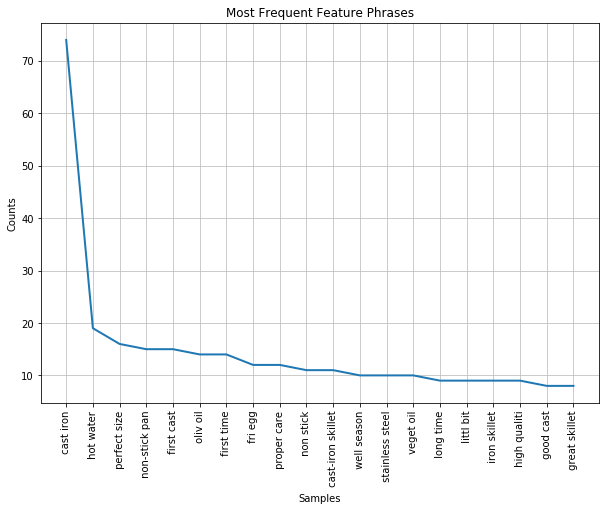

In [122]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))  # We want a bigger size plot
freqdist.plot(20, title = "Most Frequent Feature Phrases", cumulative = False)

Most common positive and negative phrases

In [123]:
# Positive
freqdist_pos = nltk.FreqDist(word for word in extracted_pos)
most_common_pos = freqdist_pos.most_common()
print(most_common_pos[:10])
print(freqdist_pos.max())
freq_tab_pos = freqdist_pos.tabulate(7)

[(' cast iron', 37), (' perfect size', 14), (' non-stick pan', 9), (' first cast', 9), (' first time', 9), (' well season', 8), (' hot water', 8), (' cast-iron skillet', 7), (' oliv oil', 6), (' great skillet', 6)]
 cast iron
     cast iron   perfect size  non-stick pan     first cast     first time    well season      hot water 
            37             14              9              9              9              8              8 


In [124]:
# Negative
freqdist_neg = nltk.FreqDist(word for word in extracted_neg)
most_common_neg = freqdist_neg.most_common()
print(most_common_neg[:10])
print(freqdist_neg.max())
freq_tab_neg = freqdist_neg.tabulate(7)

[(' cast iron', 18), (' veget oil', 8), (' fri egg', 6), (' proper care', 6), (' high qualiti', 4), (' non stick', 4), (' warm water', 4), (' non-stick pan', 4), (' stainless steel', 4), (' never cook', 3)]
 cast iron
    cast iron     veget oil       fri egg   proper care  high qualiti     non stick    warm water 
           18             8             6             6             4             4             4 


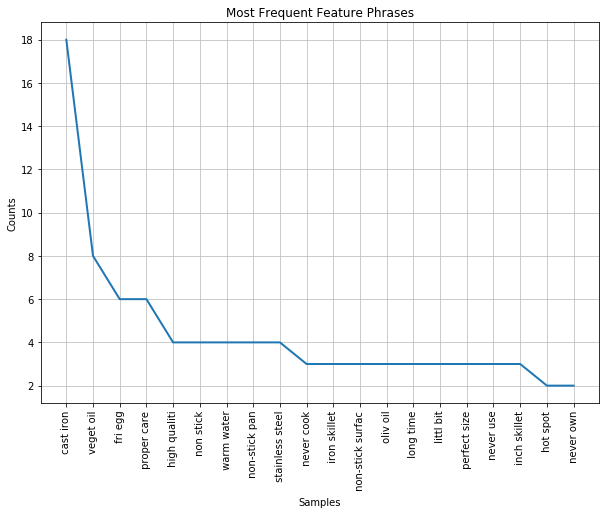

In [125]:
plt.figure(figsize=(10, 7))  # We want a bigger size plot
freqdist_neg.plot(20, title = "Most Frequent Feature Phrases", cumulative = False)

Unlemmatize and unstem using the dictionary created earlier

In [126]:
import inflect

In [127]:
print(extracted[:10])

[' non stick', ' unknown chemic', ' amaz skillet', ' alway bought', ' big cast', ' messi hassle.now', ' minim care', ' nice piec', ' virtuli non-stick', ' first fillet']


In [128]:
p = inflect.engine()
def replacewords(mc):
    newmc=[]
    for a in tqdm(mc):
        newword="";found=False;
        for b in a[0].split():            
            for x in lem_word_mapping:
                #print(x)
                #print(b)
                if b==x:
                    found=True
                    sing=(lem_word_mapping[x] if p.singular_noun(lem_word_mapping[x])==False else p.singular_noun(lem_word_mapping[x]))
                    if newword=="":
                        newword = newword + sing
                    else:
                        newword = newword + " " +  sing
            if found==False:
                if newword=="":
                    newword = newword + b
                else:
                    newword = newword + " " +  b
                    #print(newword)
        newmc.append((newword,a[1]))
    return newmc

final = replacewords(most_common)
final_pos = replacewords(most_common_pos)
final_neg = replacewords(most_common_neg)

100%|██████████| 463/463 [00:00<00:00, 4826.44it/s]


In [129]:
print("Top Feature Phrases:")
print(final[0])
print(final[:50])
print("Top Positive Feature Phrases:")
print(final_pos[0])
print(final_pos[:50])
print("Top Negative Feature Phrases:")
print(final_neg[0])
print(final_neg[:50])

Top Feature Phrases:
('casting', 74)
[('casting', 74), ('hot water', 19), ('perfection size', 16), ('non-stick pan', 15), ('first casting', 15), ('olive oiled', 14), ('first time', 14), ('fried egg', 12), ('proper careful', 12), ('non sticking', 11), ('cast-iron skillet', 11), ('well seasoning', 10), ('stainless steel', 10), ('vegetable oiled', 10), ('long time', 9), ('little bit', 9), ('iron skillet', 9), ('high quality', 9), ('good casting', 8), ('great skillet', 8), ('first used', 7), ('many year', 7), ('non-stick skillet', 7), ('inch skillet', 7), ('high heated', 7), ('great pan', 7), ('warmed', 7), ('great product', 6), ('never used', 6), ('grilled cheese', 6), ('non-stick surface', 6), ('right size', 6), ('properly seasoning', 6), ('differently size', 6), ('little oiled', 6), ('great casting', 5), ('great size', 5), ('little pan', 5), ('next time', 5), ('great quality', 5), ('small amount', 5), ('little skillet', 5), ('seasoning casting', 5), ('reason priced', 5), ('entire pan', 

We'll find out the opinions corresponding to the most common features.
Its a simple search in a bunch of lists/files at this point

In [130]:
def featuresInContext(item_arr, opinion_phrases, sentence_arr ):
    for item,support in tqdm(sorted(item_arr, key=lambda item_support: item_support[1], reverse=True)):
        count = 0
        print("------" + "Item > " + item[0] + "------")
        for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
            pcount = 0
            if normalise(item[0]) in normalise(phrase):
                count+=1
                print("---" + "Phrase > " + phrase + "----")
                for l in sentence_arr:
                    if normalise(phrase) in normalise(l):
                        # print("Debug: " + l)
                        for b in zip(l.split(" ")[:-1], l.split(" ")[1:]):
                            #print(b[0]+" "+b[1])
                            if normalise(b[0])==normalise(item[0]):
                                print("---" + "examplex" + "----")
                                print(l.replace("'","").replace("]","").replace("[",""))
                                pcount+=1
                                break
                            elif (normalise(b[0])+" "+normalise(b[1]))==normalise(item[0]):
                                print("---" + "exampley" + "----")
                                print(l.replace("'","").replace("]","").replace("[",""))
                                pcount+=1
                                break
                        if pcount==4:
                            break                
            if count==4:
                break 
        
# sent_str = ""
# sent_str = sent_str.join(sent_fullreview)
# token_sentences = sent_tokenizer1.tokenize(sent_str)
# featuresInContext(items, final, sent_fullreview)

In [146]:
import time

In [147]:
print("content" + time.strftime("%Y%m%d-%H%M%S"))

content20190626-130605


In [131]:
def featuresInContextA(item_arr, opinion_phrases, sentence_arr ):
    for item,support in tqdm(sorted(item_arr, key=lambda item_support: item_support[1], reverse=True)):
        count = 0
        print("------" + "Item > " + item[0] + "------")
        for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
            pcount = 0
            count+=1
            print("---" + "Phrase > " + str(count) + " >>> " + phrase + "----")
            for l in sentence_arr:
                if (normalise(phrase) in normalise(l)) and (normalise(item[0]) in normalise(l)):
                    pcount+=1
                    print("---" + "example > " + str(pcount) + " >>> " + "----")
                    print(l)
                    if pcount==4:
                        break                
            if count==4:
                break 
        
              

In [160]:
def featuresInContextB(item_arr, opinion_phrases, sentence_arr ):
    # Count of the phrases
    count = 0
    # Latest time in a string
    timestr = time.strftime("%Y%m%d-%H%M%S")
    # Outputfile
    print("File created at: " + timestr)
    output_file_name = "o_" + timestr + ".txt"
    f= open(output_file_name,"a+")
    # Go through the phrases and print sentences that contain them
    for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
        # Count of the number of sentences
        pcount = 0
        count+=1
        f.write("\r\n")
        f.write("---" + "Phrase > " + str(count) + " >>> " + phrase + "----\r\n\r\n")
        for l in sentence_arr:
            if normalise(phrase) in normalise(l):
                pcount+=1
                f.write("---" + "example > " + str(pcount) + " >>> " + "----\r\n")
                f.write("%s\r\n" %(l))
                if pcount==4:
                    break                
        if count==4:
            break 
    f.close()

Modified to function without the item. Its assumed that the reviews are already constrained by the item in this case

In [132]:
def featuresInContextC(opinion_phrases, sentence_arr ):
    count = 0
    for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
        pcount = 0
        count +=1
        print("---" + "Phrase > " + str(count) + " >>> " + phrase + "----")
        for l in sentence_arr:            
            if normalise(phrase) in normalise(l):
                pcount +=1
                print("---" + "example > " + str(pcount) + " >>> " + "----")
                print(l)
                
                if pcount == 4:
                    break
        if count == 4:
            break
              

In [133]:
print(len(items))
items_few = items[:2]
print(len(items_few))
print(items_few)

17
2
[(('iron',), 0.5474576271186441), (('pan',), 0.43728813559322033)]


In [134]:
type(items[0])

tuple

In [135]:
print(items)

[(('iron',), 0.5474576271186441), (('pan',), 0.43728813559322033), (('cast',), 0.43728813559322033), (('iron', 'cast'), 0.43050847457627117), (('skillet',), 0.4033898305084746), (('iron', 'skillet'), 0.23728813559322035), (('iron', 'pan'), 0.2228813559322034), (('skillet', 'cast'), 0.2016949152542373), (('skillet', 'iron', 'cast'), 0.19830508474576272), (('cast', 'pan'), 0.17796610169491525), (('cast', 'iron', 'pan'), 0.17542372881355933), (('lodg',), 0.1711864406779661), (('iron', 'lodg'), 0.11949152542372882), (('time',), 0.1152542372881356), (('skillet', 'pan'), 0.11101694915254237), (('oil',), 0.10508474576271186), (('cook',), 0.10254237288135593)]


Sort by support

In [136]:
items.sort(key=lambda tup: tup[1], reverse=True) 

In [137]:
print(items)

[(('iron',), 0.5474576271186441), (('pan',), 0.43728813559322033), (('cast',), 0.43728813559322033), (('iron', 'cast'), 0.43050847457627117), (('skillet',), 0.4033898305084746), (('iron', 'skillet'), 0.23728813559322035), (('iron', 'pan'), 0.2228813559322034), (('skillet', 'cast'), 0.2016949152542373), (('skillet', 'iron', 'cast'), 0.19830508474576272), (('cast', 'pan'), 0.17796610169491525), (('cast', 'iron', 'pan'), 0.17542372881355933), (('lodg',), 0.1711864406779661), (('iron', 'lodg'), 0.11949152542372882), (('time',), 0.1152542372881356), (('skillet', 'pan'), 0.11101694915254237), (('oil',), 0.10508474576271186), (('cook',), 0.10254237288135593)]


In [161]:
featuresInContextB(items, most_common_pos, sent_pos_review)

File created at: 20190626-132157


In [162]:
featuresInContextB(items, most_common_neg, sent_neg_review)

File created at: 20190626-132158
